In [157]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",21)
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[12,6]
sns.set_style("whitegrid")
pd.set_option("display.max_columns",22)

# Project
## Foodpanda EDA Analysis 

In [158]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Foodpanda Analysis Dataset.csv")

# Data Info 

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [160]:
df.shape

(6000, 20)

<Axes: >

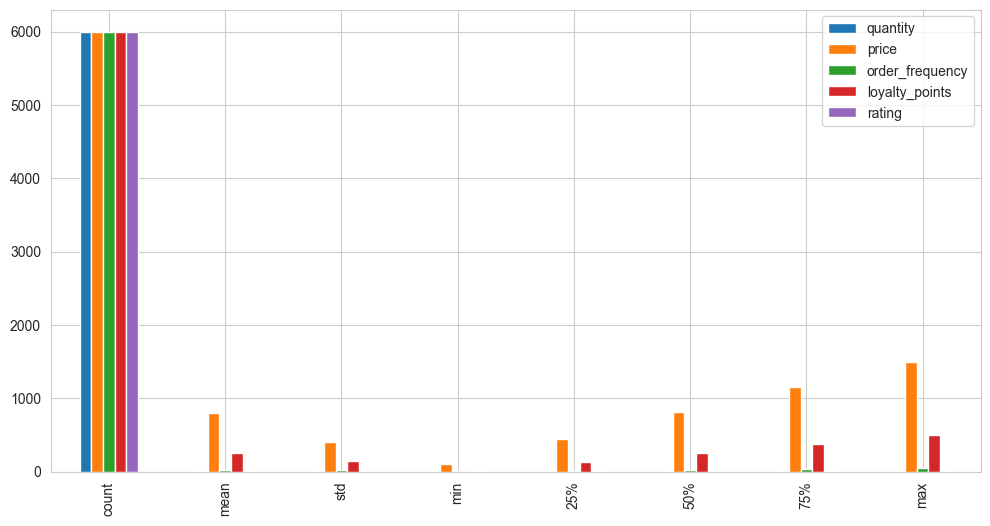

In [161]:
df.describe().plot(kind="bar")

In [162]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


# Data Cleaning & Handling

In [163]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [164]:
df["signup_date"]=pd.to_datetime(df["signup_date"])
df["order_date"]=pd.to_datetime(df["order_date"])
df["last_order_date"]=pd.to_datetime(df["last_order_date"])
df["rating_date"]=pd.to_datetime(df["rating_date"])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      6000 non-null   object        
 1   gender           6000 non-null   object        
 2   age              6000 non-null   object        
 3   city             6000 non-null   object        
 4   signup_date      6000 non-null   datetime64[ns]
 5   order_id         6000 non-null   object        
 6   order_date       6000 non-null   datetime64[ns]
 7   restaurant_name  6000 non-null   object        
 8   dish_name        6000 non-null   object        
 9   category         6000 non-null   object        
 10  quantity         6000 non-null   int64         
 11  price            6000 non-null   float64       
 12  payment_method   6000 non-null   object        
 13  order_frequency  6000 non-null   int64         
 14  last_order_date  6000 non-null   datetim

# EDA & Visualization

In [166]:
import pandas as pd
import plotly.express as px

# Convert signup_date to datetime if needed
df['signup_date'] = pd.to_datetime(df['signup_date'])

# Aggregate signups by date
daily_signups = df.groupby('signup_date').size().reset_index(name='signup_count')

# Create interactive line chart
fig = px.line(
    daily_signups,
    x='signup_date',
    y='signup_count',
    title='📈 Daily Signup Trend',
    markers=True,
    labels={'signup_date': 'Date', 'signup_count': 'Signups'}
)

# Customize layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Signups',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


In [167]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled


## Gender based customer ratio 

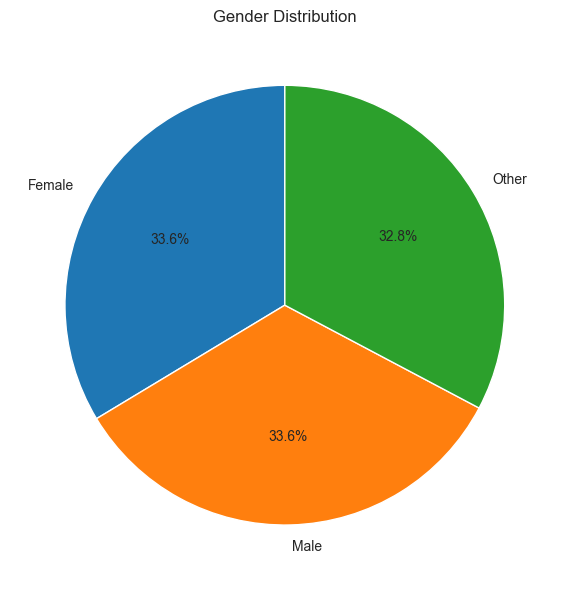

In [168]:
# Pie chart of gender distribution
plt.figure(figsize=(12, 6))
df['gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Gender Distribution')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()


## Age based customer ratio 

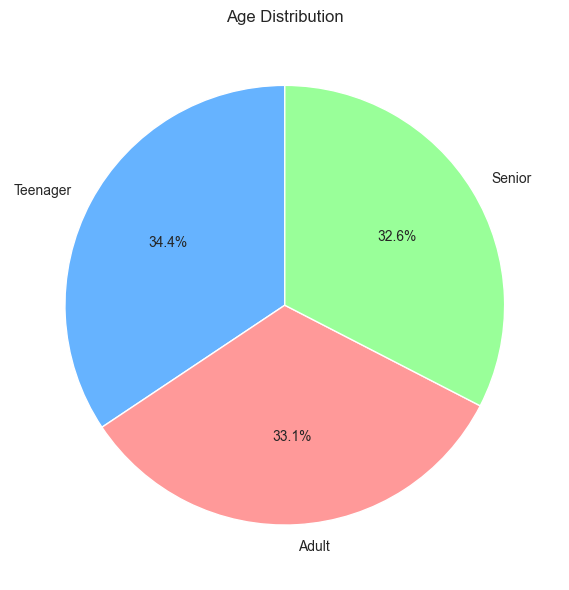

In [169]:
# Pie chart of gender distribution
plt.figure(figsize=(12, 6))
df['age'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999', '#99ff99'],  # Optional: customize colors
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Age Distribution')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

## Delivery distribution ratio 

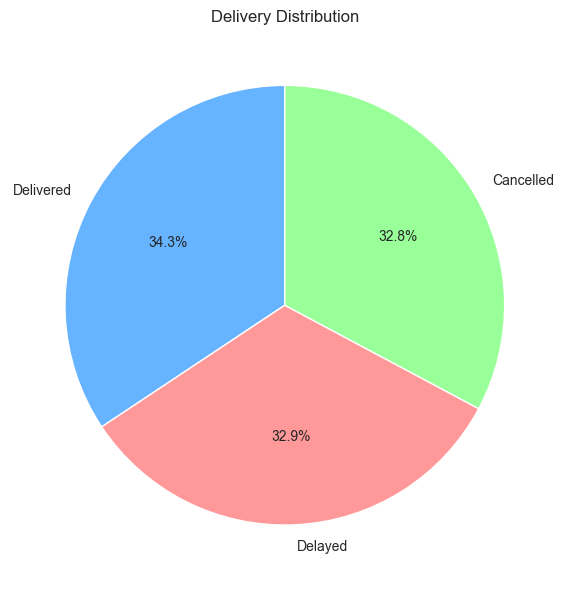

In [170]:
# Pie chart of delivery distribution
plt.figure(figsize=(12, 6))
df['delivery_status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999', '#99ff99'],  # Optional: customize colors
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Delivery Distribution')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

## Order date by counts

Text(0.5, 1.0, 'Order date by counts')

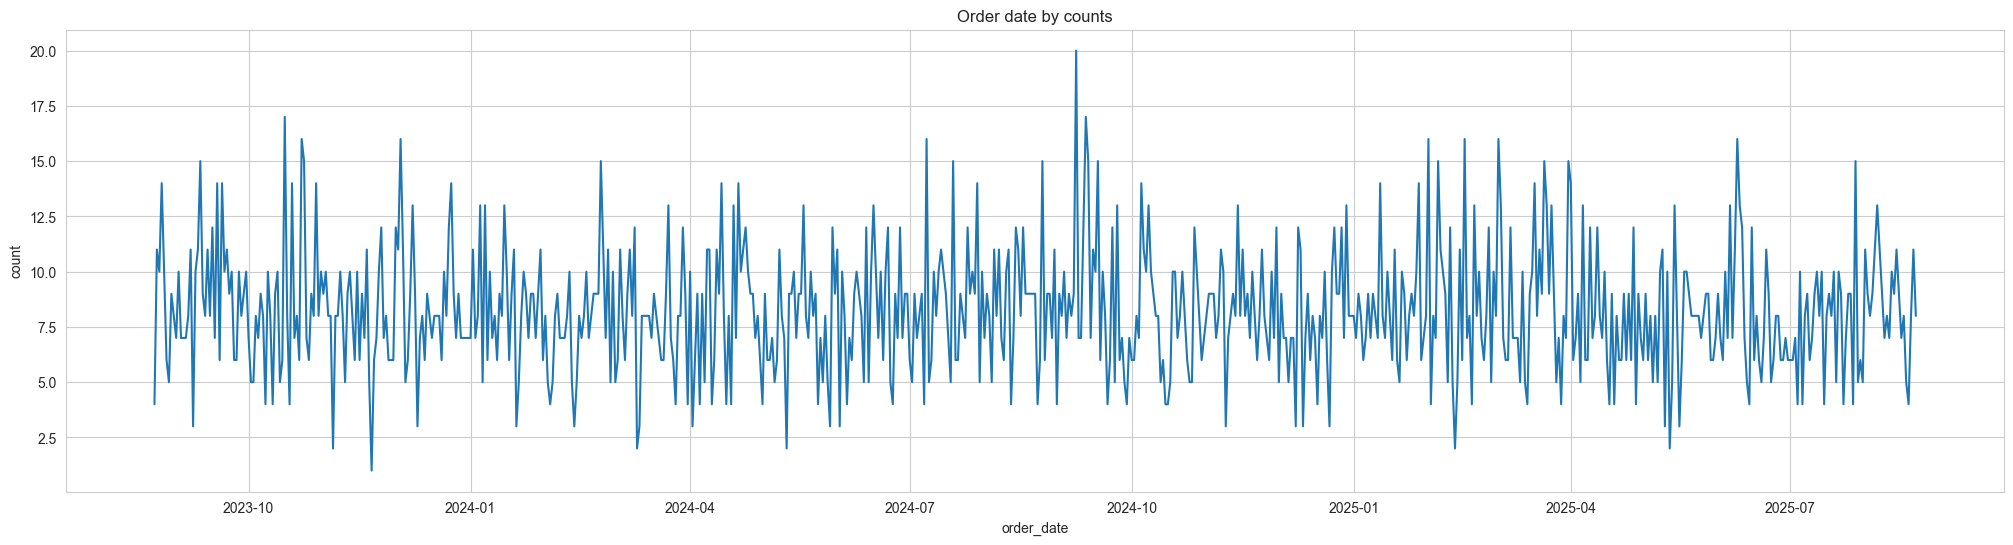

In [171]:
odr_date=df.groupby("order_date").size().reset_index(name="count")
plt.figure(figsize=(25,6))
sns.lineplot(data=odr_date,x="order_date",y="count")
plt.title("Order date by counts")

## Most ordered dish

<Figure size 1200x600 with 0 Axes>

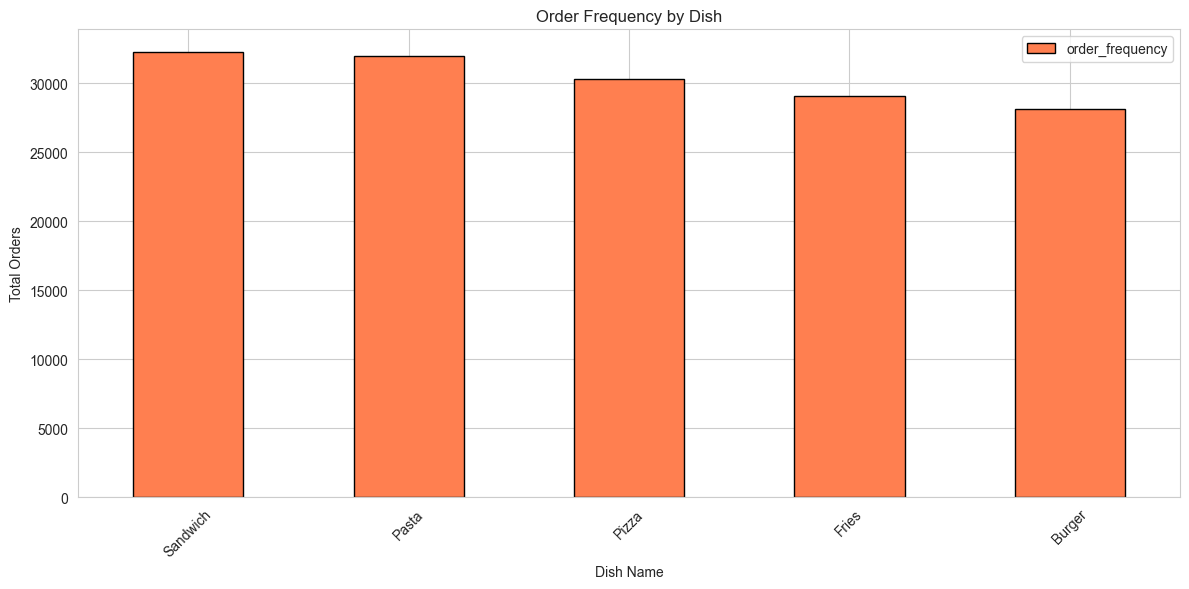

In [172]:
mo_or = df.groupby("dish_name")["order_frequency"].sum().reset_index().sort_values(by="order_frequency",ascending=False)

# Create a figure with custom size
plt.figure(figsize=(12, 6))
mo_or.plot(kind="bar", x="dish_name", y="order_frequency",color="coral",edgecolor="black")
plt.title("Order Frequency by Dish")
plt.xlabel("Dish Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## which city got the most order frequency

<Figure size 1200x600 with 0 Axes>

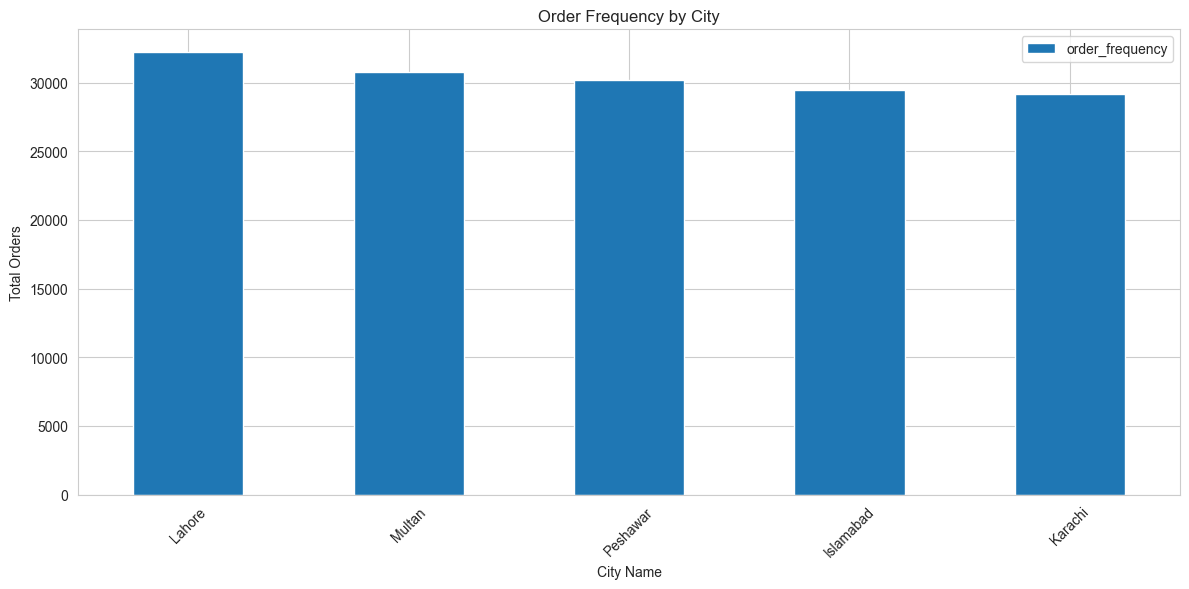

In [173]:
ci_or = df.groupby("city")["order_frequency"].sum().reset_index().sort_values(by="order_frequency",ascending=False)

# Create a figure with custom size
plt.figure(figsize=(12, 6))
ci_or.plot(kind="bar", x="city", y="order_frequency")
plt.title("Order Frequency by City")
plt.xlabel("City Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      6000 non-null   object        
 1   gender           6000 non-null   object        
 2   age              6000 non-null   object        
 3   city             6000 non-null   object        
 4   signup_date      6000 non-null   datetime64[ns]
 5   order_id         6000 non-null   object        
 6   order_date       6000 non-null   datetime64[ns]
 7   restaurant_name  6000 non-null   object        
 8   dish_name        6000 non-null   object        
 9   category         6000 non-null   object        
 10  quantity         6000 non-null   int64         
 11  price            6000 non-null   float64       
 12  payment_method   6000 non-null   object        
 13  order_frequency  6000 non-null   int64         
 14  last_order_date  6000 non-null   datetim

<Axes: xlabel='gender', ylabel='count'>

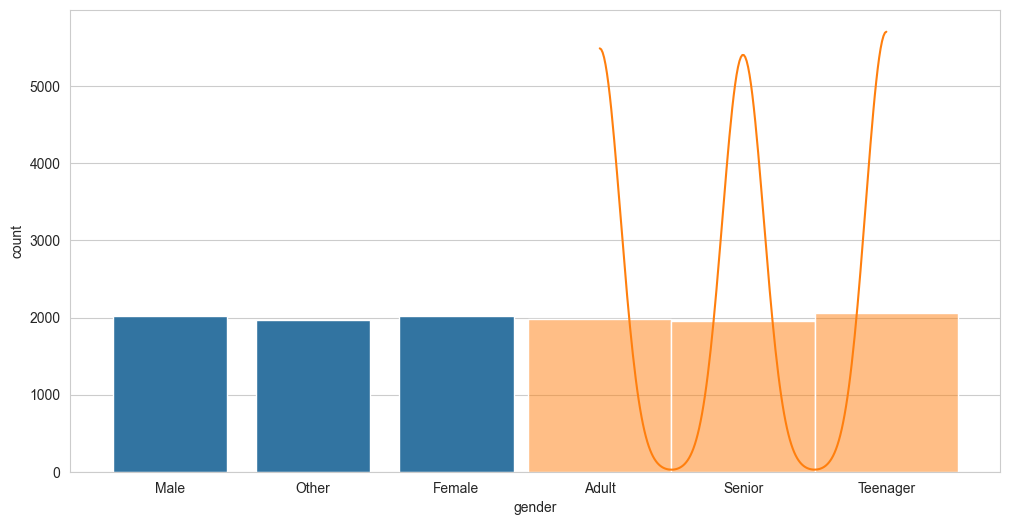

In [176]:
import seaborn as sns
sns.countplot(data=df, x='gender')
sns.histplot(data=df, x='age', bins=20, kde=True)


## City-wise Customer Spread

<Axes: ylabel='city'>

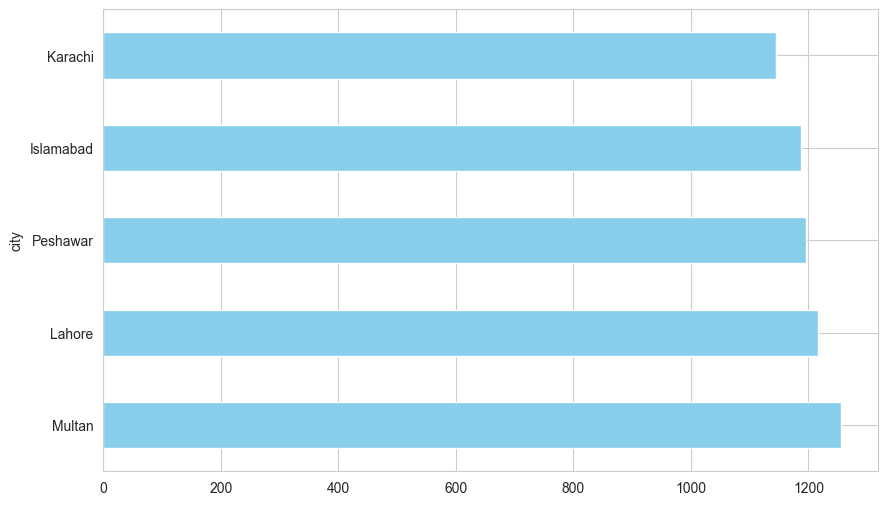

In [177]:
df['city'].value_counts().plot(kind='barh', figsize=(10,6), color='skyblue')


## Orders Over Time

<Axes: xlabel='order_date'>

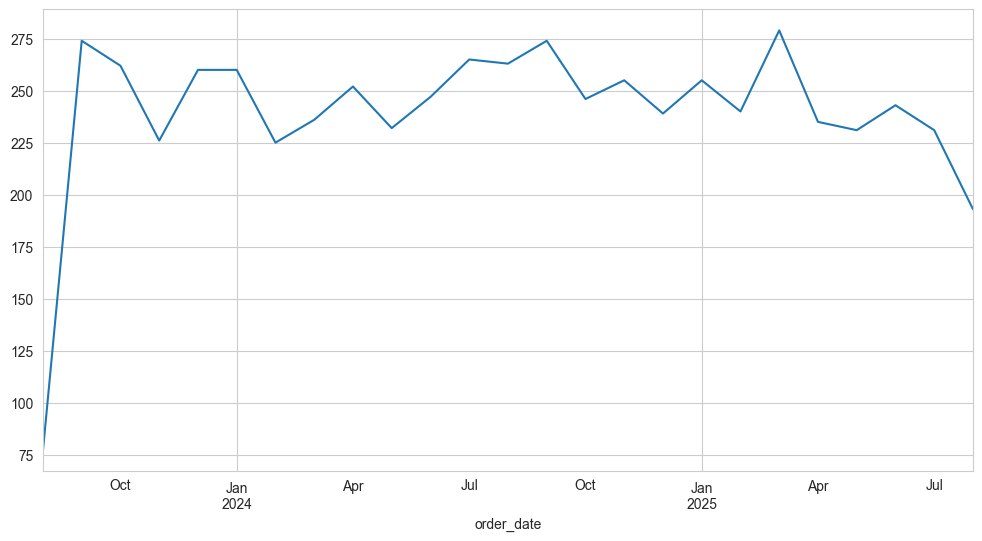

In [178]:
df['order_date'].groupby(df['order_date'].dt.to_period('M')).count().plot(figsize=(12,6))


## Catgory Popularity

<Axes: xlabel='count', ylabel='category'>

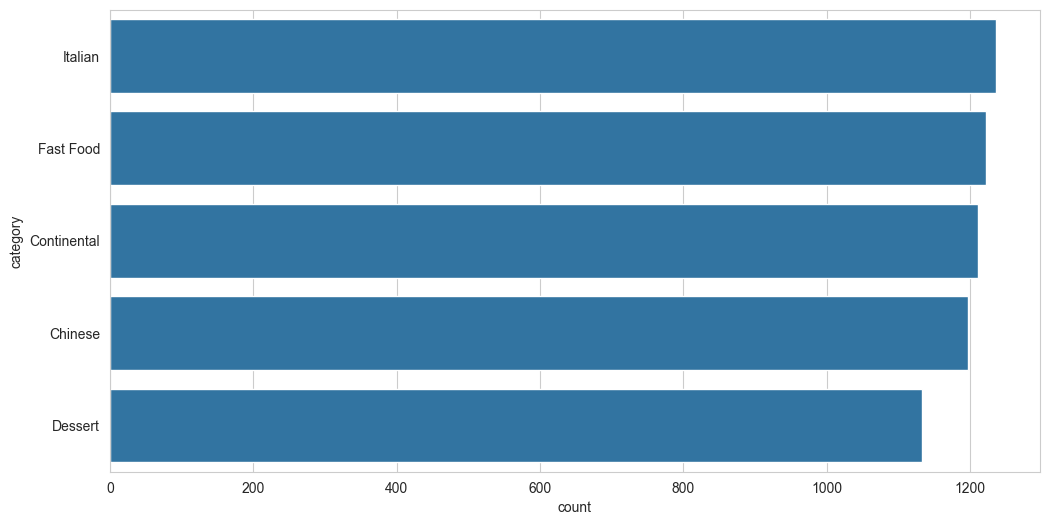

In [179]:
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)


## Revenue by Dish or Category

<Axes: ylabel='category'>

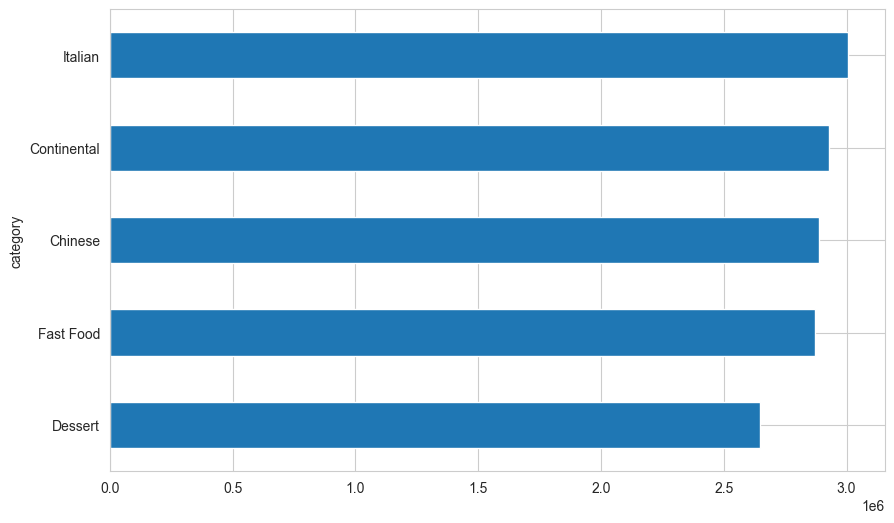

In [180]:
df['revenue'] = df['quantity'] * df['price']
df.groupby('category')['revenue'].sum().sort_values().plot(kind='barh', figsize=(10,6))


## Loyalty vs Ratings

<Axes: xlabel='loyalty_points', ylabel='rating'>

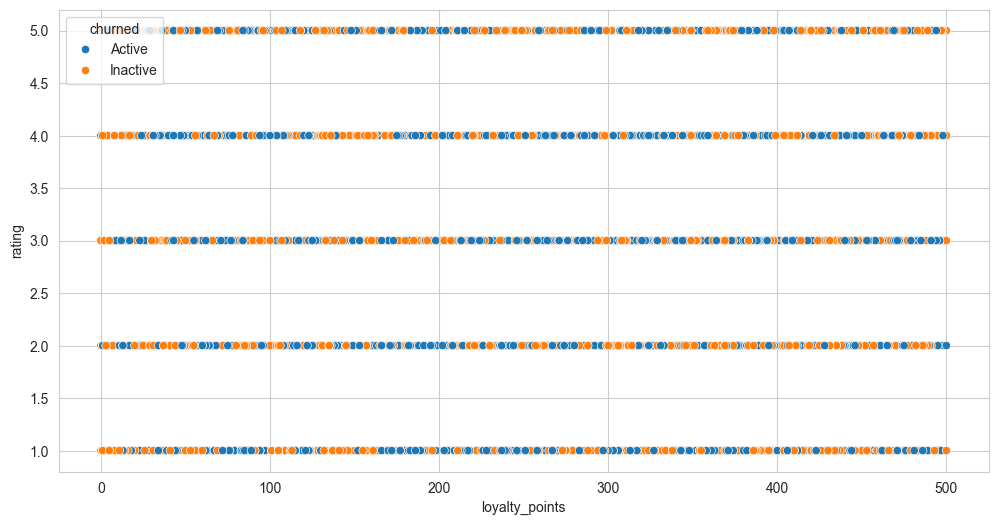

In [181]:
sns.scatterplot(data=df, x='loyalty_points', y='rating', hue='churned')


## Churn Analysis 

<Axes: xlabel='city'>

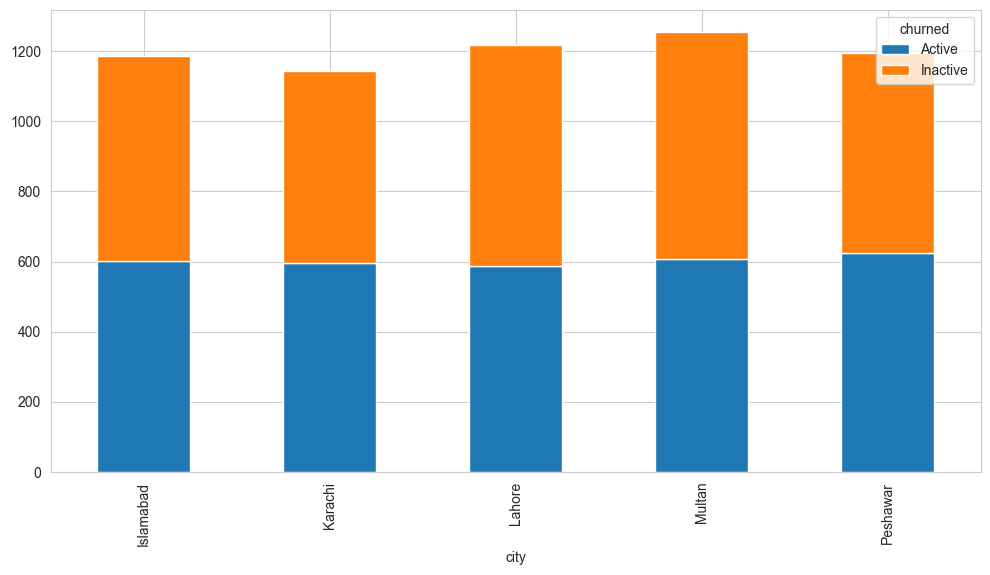

In [182]:
churn_rate = df.groupby('city')['churned'].value_counts().unstack()
churn_rate.plot(kind='bar', stacked=True, figsize=(12,6))


In [183]:
import plotly.express as px
fig = px.bar(df.groupby('category')['revenue'].sum().reset_index(),
             x='category', y='revenue', color='category',
             title='Revenue by Category')
fig.show()


In [184]:
fig = px.box(df, x='payment_method', y='rating', color='payment_method')
fig.show()

In [185]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,revenue
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled,7391.35
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed,2868.12
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed,1765.02
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed,925.20
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled,1156.69
